# Paris - City of Light
## Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## I. Introduction: Business Problem <a name="introduction"></a>

In this project we will try to help the **Mayor of Paris** and his colleagues nearby Paris to adjust the **City policies** in order to encourage **social diversity** and to increase the **attractiveness of the neighborhoods**.

Paris is a tremendous city of 2 million inhabitants, with a very rich offer of culture, history but also gastronomy and nature. Around, the "Ile de France" region is the biggest european region in terms of population and GDP. Real estate is quite expensive, and there are important discrepancies among the 20 Paris districts ("Arrondissements") and the cities which are very close to Paris.

Our project will focus on East Paris (10 arrondissements) and 10 surrounding cities close to East Paris. Data collection and interpretation will focus on two distinct parts:
- first, we will examine the **real estate** price per "Arrondissement" or city, based on the available public data of Real Estate transactions. We will calculate the average price per square meter per city.
- second, we will find the most **popular venues** and segment the neighborhoods according to the typology of their venues. Of course, Foursquera will be used to collect the associated data.

Once we have the Real Estate prices associated to each Quartier and the Venues profile, we will try to find a **correlation** between the two types of data and describe what is the **venue segment associated with a "expensive", "medium" and "low price" neighborhood**.

We will than use then our data science powers to make some recommendation for the Mayor in order to adjust the City Policies. Particularly, we will try to find **what kind of venues** should be encouraged in order to increase the **attractiveness of the low price neighborhoods**.

## II. Data <a name="data"></a>

Let's start by importing the necessary libraries

In [34]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### II.1 The geographical region we will study

The geographical region we will focus on is East Paris and the cities close to paris on it's East side.

Let's start by having a look on this part of map.

In [2]:
latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# display the map of East Paris
paris_east_map

Let's mark on the map the boundaries of the **Cities** and **"Arrondissements"** we are interested in. 

We will use for this the GeoJson file available on https://france-geojson.gregoiredavid.fr

In [3]:
#windows version of wget
import wget

url = 'https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/communes-ile-de-france.geojson'
filename = wget.download(url)

filename

communes_ile_de_france = r'communes-ile-de-france.geojson'
print(communes_ile_de_france)
folium.GeoJson(
    communes_ile_de_france
).add_to(paris_east_map)

paris_east_map

100% [............................................................................] 715186 / 715186communes-ile-de-france.geojson


In [86]:
#!wget --quiet https://france-geojson.gregoiredavid.fr/repo/regions/ile-de-france/communes-ile-de-france.geojson -O communes-ile-de-france.geojson
    
#print('GeoJSON file downloaded!')

#communes_ile_de_france = 'Communes_IDF.json'

#communes_ile_de_france = r'communes-ile-de-france.geojson'
#print(communes_ile_de_france)
#folium.GeoJson(
#    communes_ile_de_france
#).add_to(paris_east_map)

#paris_east_map

The **city_list** is the collection of ZIP codes corresponding to the cities or Paris Arrondissements we are interested in

In [87]:
city_list = [75003, 75004, 75005, 75010, 75011, 75012, 75013, 75018, 75019, 75020, 93100, 93110, 93170, 93230, 93260, 93310, 93500, 94120, 94130, 94160, 94220, 94300, 94340, 94410]

### II.2 Data related to real estate transactions

Now let's collect the data associated with the real estate transactions in thsi region.

This data is public, and a full description (in French) can be found on the site below:
https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/

The brute data can be downloaded using the site https://www.data.gouv.fr/fr/datasets/les-communes-d-ile-de-france-idf/

I have uploaded into the IBM cloud the files corresponding to the real estate sales in 2018 in 3 departments from Ile de France:
    - 75 - Paris
    - 93 - Seine Saint Denis
    - 94 - Val de Marne

They correspond to teh Paris East Region we want to study.

The hidden code below import brute data into 3 pandas Dataframes

In [5]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,20,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14,17,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
import os
os.getcwd()

'D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone'

In [88]:
#windows version

df_data_1 = pd.read_csv('D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone\\Data\\75_2018.csv')
df_data_2 = pd.read_csv('D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone\\Data\\93_2018.csv')
df_data_3 = pd.read_csv('D:\\Python\\WPy64-3741\\notebooks\\coursera_capstone\\Data\\94_2018.csv')

D:\Python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,20,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,17,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's concatenate these data into a sigle dataframe which we will call **restate_primary_data**. 

We get approx. 156,000 lines corresponding to unitary transactions on flats, houses, parkings, shops etc. sold in 2018 in these 3 departments.

In [89]:
df_list = [df_data_1, df_data_2, df_data_3]
restate_primary_data = pd.concat(df_list)

print (restate_primary_data.shape)
restate_primary_data.head()

(156424, 40)


id_mutation date_mutation  numero_disposition nature_mutation  \
0  2018-1276175    2018-01-04                   1           Vente   
1  2018-1276176    2018-01-09                   1           Vente   
2  2018-1276177    2018-01-05                   1           Vente   
3  2018-1276177    2018-01-05                   1           Vente   
4  2018-1276178    2018-01-03                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  adresse_nom_voie  \
0        1202000.0            10.0             NaN        AV PERCIER   
1         130000.0            20.0             NaN  RUE SAINT CLAUDE   
2          51000.0            24.0             NaN     RUE TREILHARD   
3          51000.0            24.0             NaN     RUE TREILHARD   
4          15000.0            12.0             NaN         RUE VOLTA   

  adresse_code_voie  code_postal  code_commune              nom_commune  \
0              7250      75008.0         75108  Paris 8e Arrondissement   
1              8520      75003.0         75103  Paris 3e Arrondissement   
2              9429      75008.0         75108  Paris 8e Arrondissement   
3              9429      75008.0         75108  Paris 8e Arrondissement   
4              9905      75003.0         75103  Paris 3e Arrondissement   

   code_departement  ancien_code_commune ancien_nom_commune     id_parcelle  \
0                75                  NaN                NaN  75108000CJ0003   
1                75                  NaN                NaN  75103000AL0072   
2                75                  NaN                NaN  75108000CI0004   
3                75                  NaN                NaN  75108000CI0004   
4                75                  NaN                NaN  75103000AE0136   

   ancien_id_parcelle numero_volume lot1_numero  lot1_surface_carrez  \
0                 NaN           NaN          77                159.2   
1                 NaN           NaN         206                  NaN   
2                 NaN           NaN          20                  NaN   
3                 NaN           NaN          27                  NaN   
4                 NaN           NaN           7                  8.3   

  lot2_numero  lot2_surface_carrez  lot3_numero  lot3_surface_carrez  \
0          78                  NaN         79.0                  NaN   
1         213                  NaN        214.0                  NaN   
2         NaN                  NaN          NaN                  NaN   
3         NaN                  NaN          NaN                  NaN   
4         NaN                  NaN          NaN                  NaN   

   lot4_numero  lot4_surface_carrez  lot5_numero  lot5_surface_carrez  \
0          NaN                  NaN          NaN                  NaN   
1        216.0                  NaN          NaN                  NaN   
2          NaN                  NaN          NaN                  NaN   
3          NaN                  NaN          NaN                  NaN   
4          NaN                  NaN          NaN                  NaN   

   nombre_lots  code_type_local   type_local  surface_reelle_bati  \
0            3              2.0  Appartement                120.0   
1            4              2.0  Appartement                 22.0   
2            1              3.0   Dépendance                  NaN   
3            1              3.0   Dépendance                  NaN   
4            1              2.0  Appartement                  9.0   

   nombre_pieces_principales code_nature_culture nature_culture  \
0                        2.0                 NaN            NaN   
1                        1.0                 NaN            NaN   
2                        0.0                 NaN            NaN   
3                        0.0                 NaN            NaN   
4                        1.0                 NaN            NaN   

  code_nature_culture_speciale nature_culture_speciale  surface_terrain  \
0                          NaN  

We will keep only 13 usefull columns ans perform some data cleaning.

In [90]:
restate_primary_data = restate_primary_data[['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation', 'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie', 'code_postal', 'nom_commune', 'type_local', 'surface_reelle_bati', 'longitude', 'latitude']]
restate_primary_data[['numero_disposition']] = 1
restate_primary_data.replace({'adresse_numero': np.NaN}, value=0, inplace=True)
restate_primary_data = restate_primary_data.astype({'adresse_numero': 'int64'}, copy=False)
restate_primary_data.replace({'code_postal': np.NaN}, value=0, inplace=True)
restate_primary_data = restate_primary_data.astype({'code_postal': 'int64'}, copy=False)
restate_primary_data.replace({'surface_reelle_bati': np.NaN}, value=0, inplace=True)
print (restate_primary_data.shape)
restate_primary_data.head()

(156424, 13)


id_mutation date_mutation  numero_disposition nature_mutation  \
0  2018-1276175    2018-01-04                   1           Vente   
1  2018-1276176    2018-01-09                   1           Vente   
2  2018-1276177    2018-01-05                   1           Vente   
3  2018-1276177    2018-01-05                   1           Vente   
4  2018-1276178    2018-01-03                   1           Vente   

   valeur_fonciere  adresse_numero  adresse_nom_voie  code_postal  \
0        1202000.0              10        AV PERCIER        75008   
1         130000.0              20  RUE SAINT CLAUDE        75003   
2          51000.0              24     RUE TREILHARD        75008   
3          51000.0              24     RUE TREILHARD        75008   
4          15000.0              12         RUE VOLTA        75003   

               nom_commune   type_local  surface_reelle_bati  longitude  \
0  Paris 8e Arrondissement  Appartement                120.0   2.315005   
1  Paris 3e Arrondissement  Appartement                 22.0   2.365335   
2  Paris 8e Arrondissement   Dépendance                  0.0   2.313122   
3  Paris 8e Arrondissement   Dépendance                  0.0   2.313122   
4  Paris 3e Arrondissement  Appartement                  9.0   2.357140   

    latitude  
0  48.874705  
1  48.860248  
2  48.877067  
3  48.877067  
4  48.864804

Here below is the list of zip codes for the Arrondissements and Cities we would like to study.

We will include the data for these cities into a new dataframe called **df_east_paris_primary**. We get a reduced list of approx. **56,000** elementary transactions.

In [91]:
city_list = [75003, 75004, 75005, 75010, 75011, 75012, 75013, 75018, 75019, 75020, 93100, 93110, 93170, 93230, 93260, 93310, 93500, 94120, 94130, 94160, 94220, 94300, 94340, 94410]

for code_city in city_list:
    if code_city == 75003:
        df_east_paris_primary = restate_primary_data.loc[restate_primary_data['code_postal'] == code_city]
    else:
        df_east_paris_primary = df_east_paris_primary.append(restate_primary_data.loc[restate_primary_data['code_postal'] == code_city])

df_east_paris_primary.shape

(55786, 13)

Let's take a look on how many elementary transactions we have per Arrondissement or City for our **city_list**

In [92]:
df_east_paris_primary.reset_index(drop=True, inplace=True)
df_east_paris_primary.groupby(['code_postal'])['nom_commune'].value_counts()

code_postal  nom_commune             
75003        Paris 3e Arrondissement     1347
75004        Paris 4e Arrondissement     1378
75005        Paris 5e Arrondissement     1383
75010        Paris 10e Arrondissement    3254
75011        Paris 11e Arrondissement    4832
75012        Paris 12e Arrondissement    3703
75013        Paris 13e Arrondissement    2883
75018        Paris 18e Arrondissement    6245
75019        Paris 19e Arrondissement    5134
75020        Paris 20e Arrondissement    3658
93100        Montreuil                   2693
93110        Rosny-sous-Bois             1813
93170        Bagnolet                     984
93230        Romainville                 5685
93260        Les Lilas                   1011
93310        Le Pré-Saint-Gervais         495
93500        Pantin                      1650
94120        Fontenay-sous-Bois          1630
94130        Nogent-sur-Marne            1342
94160        Saint-Mandé                  869
94220        Charenton-le-Pont            

What type of transactions do we have here?

In [93]:
df_east_paris_primary.groupby(['numero_disposition'])['nature_mutation'].value_counts()

numero_disposition  nature_mutation                   
1                   Vente                                 50583
                    Vente en l'état futur d'achèvement     4542
                    Echange                                 382
                    Adjudication                            181
                    Vente terrain à bâtir                    81
                    Expropriation                            17
Name: nature_mutation, dtype: int64

And how many objects have been transacted (appartment, houses, shops etc...)?

In [94]:
df_east_paris_primary.groupby(['numero_disposition'])['type_local'].value_counts()

numero_disposition  type_local                              
1                   Appartement                                 33133
                    Dépendance                                  12819
                    Local industriel. commercial ou assimilé     3842
                    Maison                                       1240
Name: type_local, dtype: int64

We will now keep only simple classical transactions (sale) and we will add category columns for the type of object sold (appartment, house etc.)

In [95]:
index_coll = df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Adjudication'].index
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Echange'].index)
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Expropriation'].index)
index_coll = index_coll.append(df_east_paris_primary[df_east_paris_primary['nature_mutation'] == 'Vente terrain à bâtir'].index)
index_coll = index_coll.sort_values()
df_east_paris_primary.drop(index_coll, inplace=True)
df_east_paris_primary = pd.concat([df_east_paris_primary,pd.get_dummies(df_east_paris_primary['type_local'])], axis=1)
df_east_paris_primary.groupby(['numero_disposition'])['nature_mutation'].value_counts()
df_east_paris_primary.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
0  2018-1276176    2018-01-09                   1           Vente   
1  2018-1276178    2018-01-03                   1           Vente   
2  2018-1276181    2018-01-09                   1           Vente   
3  2018-1276181    2018-01-09                   1           Vente   
4  2018-1276181    2018-01-09                   1           Vente   

   valeur_fonciere  adresse_numero  adresse_nom_voie  code_postal  \
0         130000.0              20  RUE SAINT CLAUDE        75003   
1          15000.0              12         RUE VOLTA        75003   
2        1840000.0             251  RUE SAINT MARTIN        75003   
3        1840000.0             251  RUE SAINT MARTIN        75003   
4        1840000.0             251  RUE SAINT MARTIN        75003   

               nom_commune   type_local  surface_reelle_bati  longitude  \
0  Paris 3e Arrondissement  Appartement                 22.0   2.365335   
1  Paris 3e Arrondissement  Appartement                  9.0   2.357140   
2  Paris 3e Arrondissement   Dépendance                  0.0   2.353682   
3  Paris 3e Arrondissement   Dépendance                  0.0   2.353682   
4  Paris 3e Arrondissement  Appartement                180.0   2.353682   

    latitude  Appartement  Dépendance  \
0  48.860248            1           0   
1  48.864804            1           0   
2  48.866408            0           1   
3  48.866408            0           1   
4  48.866408            1           0   

   Local industriel. commercial ou assimilé  Maison  
0                                         0       0  
1                                         0       0  
2                                         0       0  
3                                         0       0  
4                                         0       0

Now let's group the elements per transaction. We will keep a **single line per transaction** (while in the original files there was a line per object sold).

At the end, we havve approx. **32,000** of global transactions concerning this geographical zone.

In [96]:
df1 = df_east_paris_primary.groupby(['id_mutation', 'date_mutation', 'nature_mutation', 'code_postal', 'nom_commune'])\
    [['adresse_numero', 'adresse_nom_voie','valeur_fonciere', 'longitude', 'latitude']].max().reset_index()

df2 = df_east_paris_primary.groupby(['id_mutation'])\
    [['numero_disposition', 'surface_reelle_bati', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé', 'Maison']].sum().reset_index()

df3 = df1.join(df2.set_index('id_mutation'), on='id_mutation')
df3 = df3.astype({'Appartement': 'int64'}, copy=False)
df3 = df3.astype({'Dépendance': 'int64'}, copy=False)
df3 = df3.astype({'Local industriel. commercial ou assimilé': 'int64'}, copy=False)
df3 = df3.astype({'Maison': 'int64'}, copy=False)
print (df3.shape)
df3.head()

(32447, 16)


id_mutation date_mutation nature_mutation  code_postal  nom_commune  \
0  2018-1195952    2018-01-03           Vente        93230  Romainville   
1  2018-1195953    2018-01-08           Vente        93500       Pantin   
2  2018-1195954    2018-01-05           Vente        93170     Bagnolet   
3  2018-1195955    2018-01-05           Vente        93500       Pantin   
4  2018-1195958    2018-01-05           Vente        93260    Les Lilas   

   adresse_numero   adresse_nom_voie  valeur_fonciere  longitude   latitude  \
0              25  BD EMILE GENEVOIX         230000.0   2.435743  48.881934   
1               4      RUE LAPEROUSE          90000.0   2.393240  48.900227   
2               2  RUE DES LORIETTES         222000.0   2.420057  48.872363   
3              31         RUE DELIZY         278000.0   2.408445  48.896071   
4              45   BD DE LA LIBERTE         626400.0   2.420566  48.880405   

   numero_disposition  surface_reelle_bati  Appartement  Dépendance  \
0                   2                 59.0            1           1   
1                   1                 40.0            1           0   
2                   1                 55.0            1           0   
3                   2                 52.0            1           1   
4                   1                110.0            0           0   

   Local industriel. commercial ou assimilé  Maison  
0                                         0       0  
1                                         0       0  
2                                         0       0  
3                                         0       0  
4                                         0       1

We will now keep only the transactions concerning the **Appartments** and drop everything else. 

Final data will be stored in **east_paris_transactions** dataframe

In [97]:
index_coll = df3[df3['Local industriel. commercial ou assimilé'] >= 1].index
index_coll = index_coll.append(df3[df3['Maison'] >= 1].index)
index_coll = index_coll.append(df3[df3['Appartement'] < 1].index)
east_paris_transactions = df3.drop(index_coll)
east_paris_transactions.reset_index(drop=True, inplace=True)
print(east_paris_transactions.shape)

(23904, 16)


We will now calculate and enrich the dataframe with the **price per square meter**.

In [98]:
#insert a new column - prix au m2
east_paris_transactions['nombre_transactions'] = 1
east_paris_transactions['prix_m2'] = east_paris_transactions['valeur_fonciere'] / east_paris_transactions['surface_reelle_bati']

east_paris_transactions.head()

id_mutation date_mutation nature_mutation  code_postal  nom_commune  \
0  2018-1195952    2018-01-03           Vente        93230  Romainville   
1  2018-1195953    2018-01-08           Vente        93500       Pantin   
2  2018-1195954    2018-01-05           Vente        93170     Bagnolet   
3  2018-1195955    2018-01-05           Vente        93500       Pantin   
4  2018-1195960    2018-01-05           Vente        93500       Pantin   

   adresse_numero   adresse_nom_voie  valeur_fonciere  longitude   latitude  \
0              25  BD EMILE GENEVOIX         230000.0   2.435743  48.881934   
1               4      RUE LAPEROUSE          90000.0   2.393240  48.900227   
2               2  RUE DES LORIETTES         222000.0   2.420057  48.872363   
3              31         RUE DELIZY         278000.0   2.408445  48.896071   
4             143     AV JEAN LOLIVE         695000.0   2.412250  48.893774   

   numero_disposition  surface_reelle_bati  Appartement  Dépendance  \
0                   2                 59.0            1           1   
1                   1                 40.0            1           0   
2                   1                 55.0            1           0   
3                   2                 52.0            1           1   
4                   3                107.0            1           2   

   Local industriel. commercial ou assimilé  Maison  nombre_transactions  \
0                                         0       0                    1   
1                                         0       0                    1   
2                                         0       0                    1   
3                                         0       0                    1   
4                                         0       0                    1   

       prix_m2  
0  3898.305085  
1  2250.000000  
2  4036.363636  
3  5346.153846  
4  6495.327103

Let's take a look at the distribution of price per square meter in our data, city by city. We will use a boxplot graph.

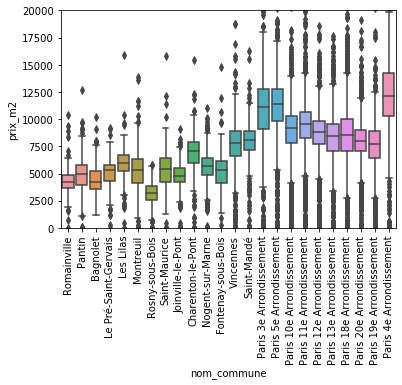

In [99]:
sns.boxplot(x="nom_commune", y="prix_m2", data=east_paris_transactions)
plt.ylim(0, 20000)
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')

So, depending on the cityes, median price go between **3000€/m²** and more than **12000€/m²**.

Let's take a look at the outliers, and simply drop them (pirces per squere meter above 20000€ or below 500€). The number of transactions we will keep per city is herebelow.

In [100]:
index_coll = east_paris_transactions[east_paris_transactions['prix_m2'] > 20000].index
index_coll = index_coll.append(east_paris_transactions[east_paris_transactions['prix_m2'] < 500].index)
east_paris_transactions = east_paris_transactions.drop(index_coll)
east_paris_transactions.reset_index(drop=True, inplace=True)
print(east_paris_transactions.shape)

east_paris_transactions.groupby(['code_postal', 'nom_commune'])['nombre_transactions'].sum()

(23367, 18)


code_postal  nom_commune             
75003        Paris 3e Arrondissement      760
75004        Paris 4e Arrondissement      524
75005        Paris 5e Arrondissement      824
75010        Paris 10e Arrondissement    1627
75011        Paris 11e Arrondissement    2561
75012        Paris 12e Arrondissement    1675
75013        Paris 13e Arrondissement    1576
75018        Paris 18e Arrondissement    3626
75019        Paris 19e Arrondissement    1829
75020        Paris 20e Arrondissement    2123
93100        Montreuil                   1035
93110        Rosny-sous-Bois              472
93170        Bagnolet                     312
93230        Romainville                  205
93260        Les Lilas                    275
93310        Le Pré-Saint-Gervais         198
93500        Pantin                       643
94120        Fontenay-sous-Bois           430
94130        Nogent-sur-Marne             572
94160        Saint-Mandé                  407
94220        Charenton-le-Pont            

#### To resume, we have now, in the dataframe east_paris_transactions the list of real estate transactions from 2018 in the cities of our choice, with the associated price / squere meter

#### This list contains approx. 23,000 transactions

### II.3 Divide geographical space in square tiles

Now let's analyse the geographical shape of our list of cities and divide this surface in a grid of 15x15 tiles.

In [101]:
bins_lat = np.linspace(min(east_paris_transactions['latitude']), max(east_paris_transactions['latitude']), 16)
lat_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
east_paris_transactions['bins_lat'] = pd.cut(east_paris_transactions['latitude'], bins_lat, labels=lat_names, include_lowest=True)
bins_long = np.linspace(min(east_paris_transactions['longitude']), max(east_paris_transactions['longitude']), 16)
long_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
east_paris_transactions['bins_long'] = pd.cut(east_paris_transactions['longitude'], bins_long, labels=long_names, include_lowest=True)

east_paris_transactions.head()

id_mutation date_mutation nature_mutation  code_postal  nom_commune  \
0  2018-1195952    2018-01-03           Vente        93230  Romainville   
1  2018-1195953    2018-01-08           Vente        93500       Pantin   
2  2018-1195954    2018-01-05           Vente        93170     Bagnolet   
3  2018-1195955    2018-01-05           Vente        93500       Pantin   
4  2018-1195960    2018-01-05           Vente        93500       Pantin   

   adresse_numero   adresse_nom_voie  valeur_fonciere  longitude   latitude  \
0              25  BD EMILE GENEVOIX         230000.0   2.435743  48.881934   
1               4      RUE LAPEROUSE          90000.0   2.393240  48.900227   
2               2  RUE DES LORIETTES         222000.0   2.420057  48.872363   
3              31         RUE DELIZY         278000.0   2.408445  48.896071   
4             143     AV JEAN LOLIVE         695000.0   2.412250  48.893774   

   numero_disposition  surface_reelle_bati  Appartement  Dépendance  \
0                   2                 59.0            1           1   
1                   1                 40.0            1           0   
2                   1                 55.0            1           0   
3                   2                 52.0            1           1   
4                   3                107.0            1           2   

   Local industriel. commercial ou assimilé  Maison  nombre_transactions  \
0                                         0       0                    1   
1                                         0       0                    1   
2                                         0       0                    1   
3                                         0       0                    1   
4                                         0       0                    1   

       prix_m2 bins_lat bins_long  
0  3898.305085       10         9  
1  2250.000000       12         5  
2  4036.363636        8         7  
3  5346.153846       12         6  
4  6495.327103       11         7

We will calculate now the average **price / square meter** and the **number of transactions** which occured in each tile.

In [112]:
tiles = east_paris_transactions.groupby(['bins_lat','bins_long'])['prix_m2'].mean().reset_index()
tiles.set_index(['bins_lat', 'bins_long'])

tiles2 = east_paris_transactions.groupby(['bins_lat','bins_long'])['nombre_transactions'].sum().reset_index()
tiles2.set_index(['bins_lat', 'bins_long'])

tiles= tiles.join(tiles2.set_index(['bins_lat', 'bins_long']), on=['bins_lat','bins_long'])
tiles = tiles.dropna().set_index(['bins_lat', 'bins_long']).reset_index()
tiles = tiles.astype({'nombre_transactions': 'int64'}, copy=False)
tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions
0        0         7  5664.557788                   35
1        0         8  6827.312677                   20
2        0         9  5282.868018                    4
3        0        10  5288.182929                   37
4        0        11  4720.313914                  164

Let's enrich this tile list with the geographical information (latitude, longitude, square borders)

In [113]:
for lat in range(0, 15):
    index_list = tiles[tiles['bins_lat']==lat].index
    for k in index_list:
        tiles.at[k, 'lat_s'] = bins_lat[lat]
        tiles.at[k, 'lat_n'] = bins_lat[lat+1]
        tiles.at[k, 'latitude'] = (bins_lat[lat] + bins_lat[lat+1])/2

for long in range(0, 15):
    index_list = tiles[tiles['bins_long']==long].index
    for k in index_list:
        tiles.at[k, 'long_w'] = bins_long[long]
        tiles.at[k, 'long_e'] = bins_long[long+1]
        tiles.at[k, 'longitude'] = (bins_long[long] + bins_long[long+1])/2

for i in tiles.index:
    s = "{0}_{1}".format (tiles.loc[i, 'bins_lat'], tiles.loc[i, 'bins_long'],)
    tiles.loc[i, 'tile_id'] = s

tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0        0         7  5664.557788                   35  48.811961  48.818836   
1        0         8  6827.312677                   20  48.811961  48.818836   
2        0         9  5282.868018                    4  48.811961  48.818836   
3        0        10  5288.182929                   37  48.811961  48.818836   
4        0        11  4720.313914                  164  48.811961  48.818836   

    latitude    long_w    long_e  longitude tile_id  
0  48.815398  2.410483  2.422537   2.416510     0_7  
1  48.815398  2.422537  2.434592   2.428565     0_8  
2  48.815398  2.434592  2.446647   2.440619     0_9  
3  48.815398  2.446647  2.458701   2.452674    0_10  
4  48.815398  2.458701  2.470756   2.464729    0_11

Let's have a look of how these tiles map the list of cities and arrondissements we are interested in.

Prior, we will define a function **rectTile** which allows to create a json geometrical square object. Then, build a GeoJson file which contains the list of all our tiles.

In [114]:
def rectTile(tile_ids, long_w_list, long_e_list, lat_s_list, lat_n_list):
    
    tile_list=[]
    for tile_id, long_w, long_e, lat_s, lat_n,  in zip(tile_ids, long_w_list, long_e_list, lat_s_list, lat_n_list):
                 
        # print("tile_id ", tile_id)
        # return only relevant information for each nearby venue
        tile_list.append(
             {"type":"Feature",\
                "geometry":\
                  {"type":"Polygon",\
                     "coordinates":[[[long_w, lat_s],[long_w, lat_n],[long_e, lat_n],[long_e, lat_s]]]},\
                "properties":{"tile_id":tile_id}})
    return(tile_list)

east_tile_list = rectTile(tile_ids=tiles['tile_id'],
                                    long_w_list=tiles['long_w'],
                                    long_e_list=tiles['long_e'],
                                    lat_s_list=tiles['lat_s'],
                                    lat_n_list=tiles['lat_n']                                                                
                                  )

east_tiles = {"type":"FeatureCollection",\
"features": east_tile_list}

f = open('all_tiles.json', 'w')
json.dump(east_tiles, f)
f.close()

Now let's show the map, with the border of cities and the initial list of tiles we have built

In [115]:
latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.GeoJson(
    communes_ile_de_france
).add_to(paris_east_map)

workfile = r'all_tiles.json'
print(workfile)

folium.GeoJson(
    workfile
).add_to(paris_east_map)

paris_east_map

all_tiles.json


On the top of that, center the circles in which we will look for Foursquera venues. The optimal radius seems to be 380 meters.

In [116]:
for lat, lon in zip(tiles['latitude'], tiles['longitude']):
    #print (lat, lon)
    folium.Circle([lat, lon], radius=380, color='blue', fill=False).add_to(paris_east_map)
paris_east_map

Looks good, but it is a little bit clumsy :-(

### II.4 Foursquera

In [117]:
# @hidden_cell
CLIENT_ID = 'WRGTBGWVIWD1S0LLK0GRGEARWM2GBYEQ1QOP0PSIPNBJHOUT' # your Foursquare ID
CLIENT_SECRET = 'VALOPUUYGGEAIWKNIW5WVQRIIGYRO2EZJ0LOTKT1JDXXECKF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Now, let's get the venues for the list of tiles we have built

In [108]:
def getNearbyVenues(tile_ids, latitudes, longitudes, radius=550, LIMIT=100):
    
    venues_list=[]
    for tile_id, lat, lng in zip(tile_ids, latitudes, longitudes):
                 
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        print("tile_id ", tile_id, ": ", len(results), " venues")
        # return only relevant information for each nearby venue
        venues_list.append([(
            tile_id,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['tile_id',
                  'Tile Latitude', 
                  'Tile Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

paris_east_venues = getNearbyVenues(tile_ids=tiles['tile_id'],
                                    latitudes=tiles['latitude'],
                                    longitudes=tiles['longitude']
                                  )

paris_east_venues.tail(20)

tile_id  0_7 :  8  venues
tile_id  0_8 :  5  venues
tile_id  0_9 :  4  venues
tile_id  0_10 :  5  venues
tile_id  0_11 :  7  venues
tile_id  0_12 :  7  venues
tile_id  1_1 :  24  venues
tile_id  1_2 :  67  venues
tile_id  1_3 :  65  venues
tile_id  1_4 :  11  venues
tile_id  1_5 :  24  venues
tile_id  1_6 :  17  venues
tile_id  1_7 :  9  venues
tile_id  1_8 :  2  venues
tile_id  1_11 :  14  venues
tile_id  1_12 :  8  venues
tile_id  2_1 :  54  venues
tile_id  2_2 :  90  venues
tile_id  2_3 :  41  venues
tile_id  2_4 :  45  venues
tile_id  2_6 :  7  venues
tile_id  2_11 :  5  venues
tile_id  2_12 :  5  venues
tile_id  2_13 :  10  venues
tile_id  3_1 :  54  venues
tile_id  3_2 :  100  venues
tile_id  3_3 :  38  venues
tile_id  3_4 :  56  venues
tile_id  3_5 :  61  venues
tile_id  3_6 :  34  venues
tile_id  3_7 :  8  venues
tile_id  3_11 :  4  venues
tile_id  3_12 :  9  venues
tile_id  3_13 :  20  venues
tile_id  3_14 :  6  venues
tile_id  4_0 :  66  venues
tile_id  4_1 :  69  venues
tile

tile_id  Tile Latitude  Tile Longitude                           Venue  \
5182    13_6      48.904773        2.404455                          MurMur   
5183    13_6      48.904773        2.404455                          Ohmled   
5184    13_6      48.904773        2.404455       Compagnie d'arc de Pantin   
5185    13_7      48.904773        2.416510                     Tang Frères   
5186    13_7      48.904773        2.416510                        Carglass   
5187    13_7      48.904773        2.416510                       kedy pack   
5188    13_7      48.904773        2.416510                 Comfort Bobigny   
5189    14_5      48.911648        2.392401                   Little Burger   
5190    14_5      48.911648        2.392401                       KIngooroo   
5191    14_5      48.911648        2.392401                    Delice Pizza   
5192    14_5      48.911648        2.392401                    Yun Tian Lou   
5193    14_6      48.911648        2.404455        Théatre Équestre Zingaro   
5194    14_6      48.911648        2.404455            In Situ Art Festival   
5195    14_6      48.911648        2.404455  Métro Fort d'Aubervilliers [7]   
5196    14_6      48.911648        2.404455             ASPTT Aubervilliers   
5197    14_7      48.911648        2.416510                Les Courtilleres   
5198    14_7      48.911648        2.416510     Cafétéria Le Pont De Pierre   
5199    14_7      48.911648        2.416510              Boulangerie Louise   
5200    14_7      48.911648        2.416510               Hotel B&B Bobigny   
5201    14_7      48.911648        2.416510             Stade Marcel Cerdan   

      Venue Latitude  Venue Longitude                Venue Category  
5182       48.902748         2.401252                  Climbing Gym  
5183       48.902700         2.405864                Lighting Store  
5184       48.909057         2.401340          Gym / Fitness Center  
5185       48.903145         2.417425                   Supermarket  
5186       48.902950         2.416687             Other Repair Shop  
5187       48.904234         2.419432              Department Store  
5188       48.905784         2.422496                         Hotel  
5189       48.914881         2.392215           American Restaurant  
5190       48.907874         2.395802  Theme Park Ride / Attraction  
5191       48.907854         2.388016                   Pizza Place  
5192       48.909968         2.385437            Chinese Restaurant  
5193       48.913312         2.403522         Performing Arts Venue  
5194       48.911218         2.404677                    Street Art  
5195       48.914680         2.403635                 Metro Station  
5196       48.915901         2.406920                  Soccer Field  
5197       48.913096         2.417603                   Bus Station  
5198       48.913123         2.420003                         Diner  
5199       48.909757         2.412532                        Bakery  
5200       48.915527         2.417319                         Hotel  
5201       48.908944         2.421295                  Soccer Field

How many venues do we have?

A quick histogram will help to understand how many venues we have per tile.

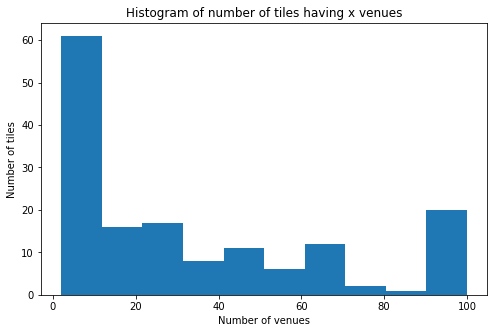

In [118]:
paris_east_venues['nombre_venues'] = 1
venues_per_tile = paris_east_venues.groupby(['tile_id','Tile Latitude', 'Tile Longitude'])['nombre_venues'].sum().reset_index()

# np.histogram returns 2 values
count, bin_edges = np.histogram(venues_per_tile['nombre_venues'])

#print(count) # frequency count
#print(bin_edges) # bin ranges, default = 10 bins

venues_per_tile['nombre_venues'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of number of tiles having x venues') # add a title to the histogram
plt.ylabel('Number of tiles') # add y-label
plt.xlabel('Number of venues') # add x-label

plt.show()

So, there are approx. 60 tiles on our area, having a very small (less than 10) number of interesting venues.

No let's add the number of venues to each tile of our **tiles** dataframe

In [119]:
tiles= tiles.join(venues_per_tile.set_index(['tile_id']), on=['tile_id'])
tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0        0         7  5664.557788                   35  48.811961  48.818836   
1        0         8  6827.312677                   20  48.811961  48.818836   
2        0         9  5282.868018                    4  48.811961  48.818836   
3        0        10  5288.182929                   37  48.811961  48.818836   
4        0        11  4720.313914                  164  48.811961  48.818836   

    latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
0  48.815398  2.410483  2.422537   2.416510     0_7      48.815398   
1  48.815398  2.422537  2.434592   2.428565     0_8      48.815398   
2  48.815398  2.434592  2.446647   2.440619     0_9      48.815398   
3  48.815398  2.446647  2.458701   2.452674    0_10      48.815398   
4  48.815398  2.458701  2.470756   2.464729    0_11      48.815398   

   Tile Longitude  nombre_venues  
0        2.416510              8  
1        2.428565              5  
2        2.440619              4  
3        2.452674              5  
4        2.464729              7

We will drop the tiles which have less than 20 real estate transactions and less then 4 venues.

In [120]:
index_coll = tiles[tiles['nombre_transactions']<20].index
tiles=tiles.drop(index_coll)
tiles.reset_index(drop=True, inplace=True)
index_coll = tiles[tiles['nombre_venues']<4].index
tiles=tiles.drop(index_coll)
tiles.reset_index(drop=True, inplace=True)
tiles.head()

bins_lat bins_long      prix_m2  nombre_transactions      lat_s      lat_n  \
0        0         7  5664.557788                   35  48.811961  48.818836   
1        0         8  6827.312677                   20  48.811961  48.818836   
2        0        10  5288.182929                   37  48.811961  48.818836   
3        0        11  4720.313914                  164  48.811961  48.818836   
4        0        12  4345.646138                   21  48.811961  48.818836   

    latitude    long_w    long_e  longitude tile_id  Tile Latitude  \
0  48.815398  2.410483  2.422537   2.416510     0_7      48.815398   
1  48.815398  2.422537  2.434592   2.428565     0_8      48.815398   
2  48.815398  2.446647  2.458701   2.452674    0_10      48.815398   
3  48.815398  2.458701  2.470756   2.464729    0_11      48.815398   
4  48.815398  2.470756  2.482811   2.476783    0_12      48.815398   

   Tile Longitude  nombre_venues  
0        2.416510              8  
1        2.428565              5  
2        2.452674              5  
3        2.464729              7  
4        2.476783              7

#### Our tiles dataframe contains now a list of geographical square zones, with the average price per square meter, the number of real estate transactions and the numbre of venues of interest for each tile

### II.5 Show real estate and number of venues on the same map

Our final part of the data analysis is to figure out - on the same map:
    - the average price per square meter
    - the number of venues
for all the tiles which cover our interest area

Let's rebuild our **east_tile_list** and generate a GeoJson file coresponding to the list of tiles of interest

In [121]:
east_tile_list = rectTile(tile_ids=tiles['tile_id'],
                                    long_w_list=tiles['long_w'],
                                    long_e_list=tiles['long_e'],
                                    lat_s_list=tiles['lat_s'],
                                    lat_n_list=tiles['lat_n']                                                                
                                  )

east_tile_list
east_tiles = {"type":"FeatureCollection",\
"features": east_tile_list}

f = open('east_tiles.json', 'w')

json.dump(east_tiles, f)

f.close()

Using a choropleth map, we will show the averag price per square meter in the various zones of interest

In [122]:
workfile = r'east_tiles.json'
print(workfile)

latitude = 48.8534
longitude = 2.4488
# create map and display it
paris_east_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.GeoJson(
    workfile
).add_to(paris_east_map)

paris_east_map

paris_east_map.choropleth(
    geo_data=workfile,
    data=tiles,
    columns=['tile_id', 'prix_m2'],
    key_on='feature.properties.tile_id',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Real Estate price per square meter'
)

paris_east_map

east_tiles.json


D:\Python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


On the top of this we will add circle markers. The radius and color will represent the number of venues available in the tail (with a maximum of 100)

In [129]:
# set color scheme for the clusters
x = np.arange(0,100)
ys = [i + x + (i*x)**2 for i in range(0,100)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



for lat, lng, nbv, nbt, prix in zip(tiles['Tile Latitude'], tiles['Tile Longitude'], tiles['nombre_venues'], tiles['nombre_transactions'], tiles['prix_m2']):
    label = '{:.0f} €/m2, {} transactions, {} venues'.format(prix, nbt, nbv)
    folium.CircleMarker(
        [lat, lng],
        radius=3+12*(nbv/100), # define how big you want the circle markers to be
       color=rainbow[nbv-1],
        fill=True,
       popup=label,
        fill_color=rainbow[nbv-1],
        fill_opacity=0.5
).add_to(paris_east_map)   
    

# display map
paris_east_map

As a first conclusion of this Data Analysis section, it seems that we have a **direct correlation** beteween the **real estate price per square meter** in a zone and the **number of venues on interest** in the same region.

A more detailed analysis will follow in the next sections

## III. Methodology <a name="methodology"></a>

## IV. Analysis <a name="analysis"></a>

## V. Results and Discussion <a name="results"></a>

## VI. Conclusion <a name="conclusion"></a>

## Appendices

In [ ]:
east_paris_cities= east_paris_transactions.groupby(['code_postal', 'nom_commune'])['prix_m2'].median().reset_index()
east_paris_cities.insert(loc=len(east_paris_cities.columns), column='latitude', value=0.0)
east_paris_cities.insert(loc=len(east_paris_cities.columns), column='longitude', value=0.0)